In [23]:
import matplotlib
import matplotlib.pyplot as pt
%matplotlib inline
matplotlib.style.use('ggplot')

import torch
import torch.optim as optim

from envs.my_mdp import StochasticMDPEnv
from envs.tetris import Tetris
from agents.my_hdqn_agent import hDQN, OptimizerSpec
from my_hdqn_learning import hdqn_learning
from utils.plotting import plot_episode_stats, plot_visited_states
from utils.schedule import LinearSchedule

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
NUM_EPISODES = 10000
# NUM_EPISODES = 12000
BATCH_SIZE = 128
GAMMA = 0.99
REPLAY_MEMORY_SIZE = 10000
LR = 1e-4


optimizer_spec = OptimizerSpec(
    constructor=optim.AdamW,
    kwargs=dict(lr=LR, amsgrad=True),
)

exploration_schedule = LinearSchedule(5000, 0.1, 1)

num_rows, num_cols = 10, 4
env = Tetris(num_rows, num_cols)

agent = hDQN(
    optimizer_spec=optimizer_spec,
    replay_memory_size=REPLAY_MEMORY_SIZE,
    batch_size=BATCH_SIZE,
    num_goal=4,
    num_action=4 * num_cols,
    num_meta_in=num_rows * num_cols + 4*4
)

# env = StochasticMDPEnv()

In [25]:
agent, stats, visits = hdqn_learning(
    env=env,
    agent=agent,
    num_episodes=NUM_EPISODES,
    exploration_schedule=exploration_schedule,
    gamma=GAMMA,
)
torch.save(agent,f'agent {num_rows} {num_cols} {NUM_EPISODES}.pt')

/home/eric/.local/lib/python3.10/site-packages/torch/nn/modules/loss.py:928: UserWarning: Using a target size (torch.Size([128])) that is different to the input size (torch.Size([128, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.smooth_l1_loss(input, target, reduction=self.reduction, beta=self.beta)


steps:    248 episode:    100 reward: 0.0 average: 4.84
goals_selection: [27. 26. 22. 26.]
steps:    502 episode:    200 reward: 0.0 average: 5.52
goals_selection: [50. 63. 45. 45.]
steps:    737 episode:    300 reward: 0.0 average: 6.22
goals_selection: [76. 86. 66. 76.]
steps:    986 episode:    400 reward: 0.0 average: 6.76
goals_selection: [108. 112.  88. 102.]
steps:   1271 episode:    500 reward: 0.0 average: 6.89
goals_selection: [129. 137. 120. 126.]
steps:   1524 episode:    600 reward: 0.0 average: 7.54
goals_selection: [157. 166. 143. 148.]
steps:   1790 episode:    700 reward: 0.0 average: 7.64
goals_selection: [189. 196. 166. 166.]
steps:   2067 episode:    800 reward: 80.0 average: 7.88
goals_selection: [224. 223. 197. 181.]
steps:   2333 episode:    900 reward: 40.0 average: 8.03
goals_selection: [244. 263. 220. 201.]
steps:   2563 episode:   1000 reward: 0.0 average: 8.05
goals_selection: [276. 296. 245. 218.]
steps:   2829 episode:   1100 reward: 0.0 average: 7.97
goal

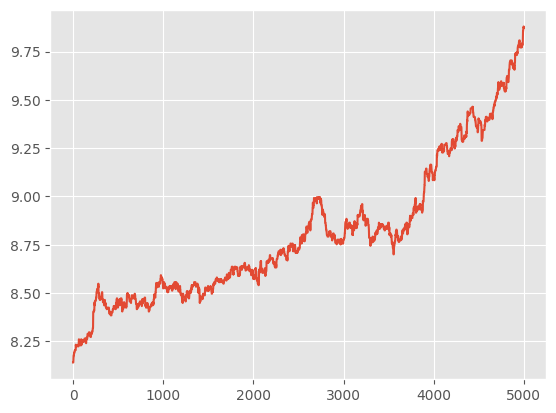

In [26]:
import numpy as np
episode_returns = stats.episode_rewards
window_size = 5000
moving_average = np.convolve(episode_returns, np.ones(window_size), 'valid') / window_size
pt.plot(moving_average)
pt.savefig('moving_average')
# print(sum(stats.episode_rewards))
# plot_episode_stats(stats)

In [27]:
agent = torch.load('agent 10 4 1000.pt')
print(agent.num_goal)

4
